<a href="https://colab.research.google.com/github/Shahrukh-DS/Shahrukh-DS2/blob/main/shahrukh_code_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (456, 8)


,ID,TIME,Y,age,sex,ecog,karnoPH,karnoPAT
0,1,0,0,74,M,1,90,100
1,1,306,1,74,M,1,90,100
2,2,0,0,68,M,0,90,90
3,2,455,1,68,M,0,90,90
4,3,0,0,56,M,0,90,90



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        456 non-null    int64 
 1   TIME      456 non-null    int64 
 2   Y         456 non-null    int64 
 3   age       456 non-null    int64 
 4   sex       456 non-null    object
 5   ecog      456 non-null    int64 
 6   karnoPH   456 non-null    int64 
 7   karnoPAT  456 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 28.6+ KB

--- Missing Values ---
ID          0
TIME        0
Y           0
age         0
sex         0
ecog        0
karnoPH     0
karnoPAT    0
dtype: int64

--- Target Distribution ---
Y
0    291
1    165
Name: count, dtype: int64


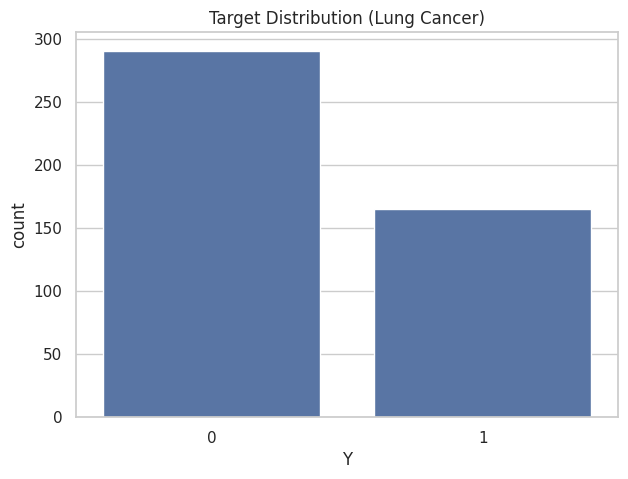

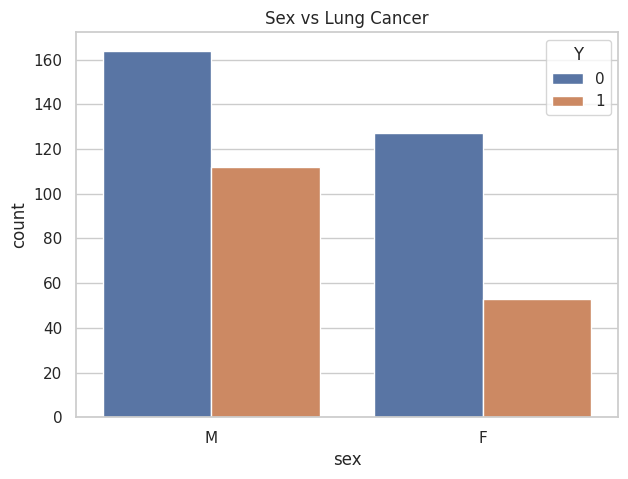

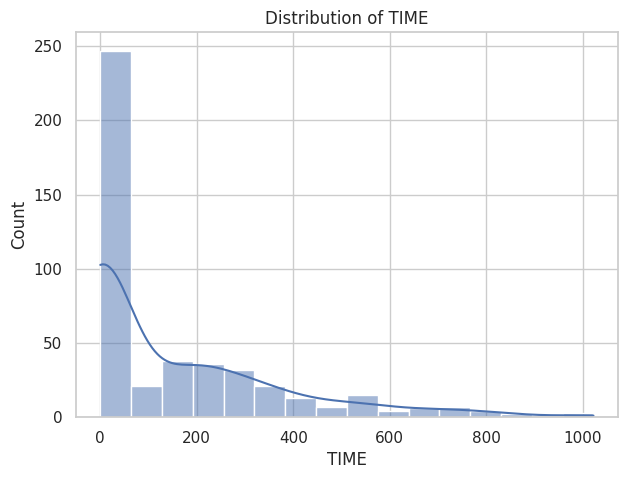

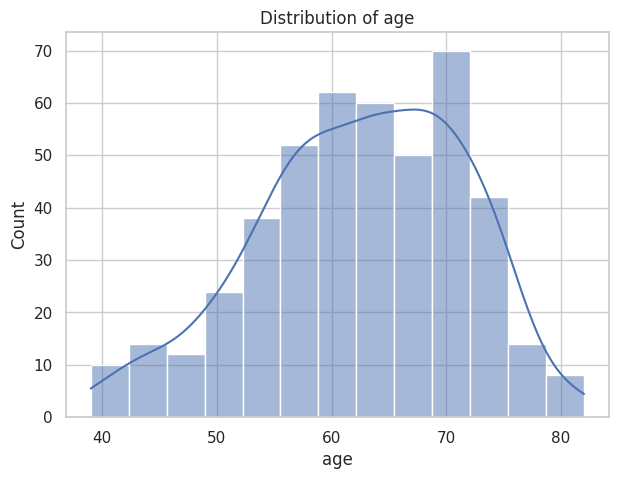

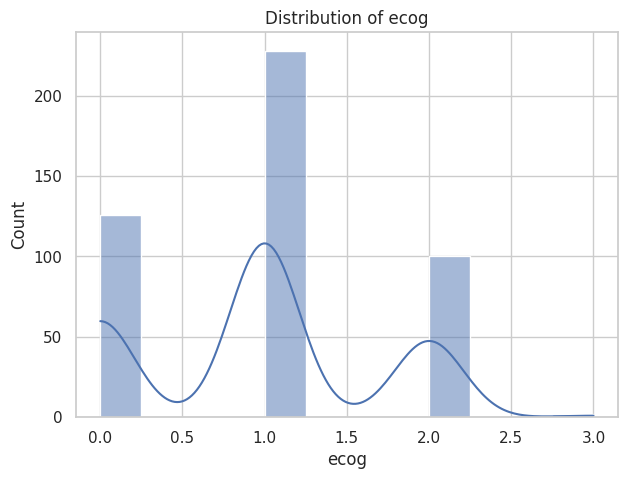

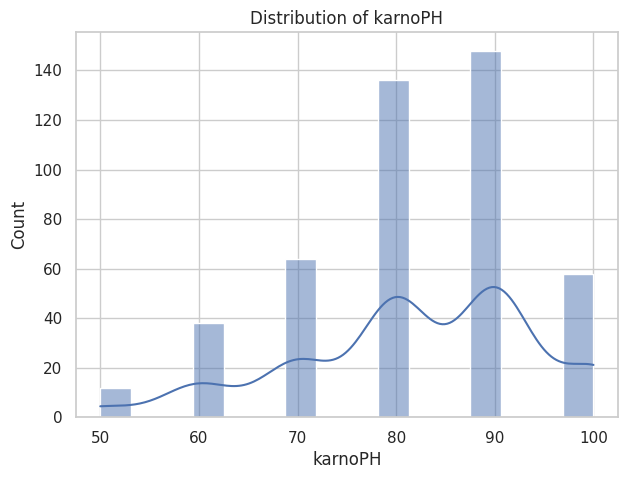

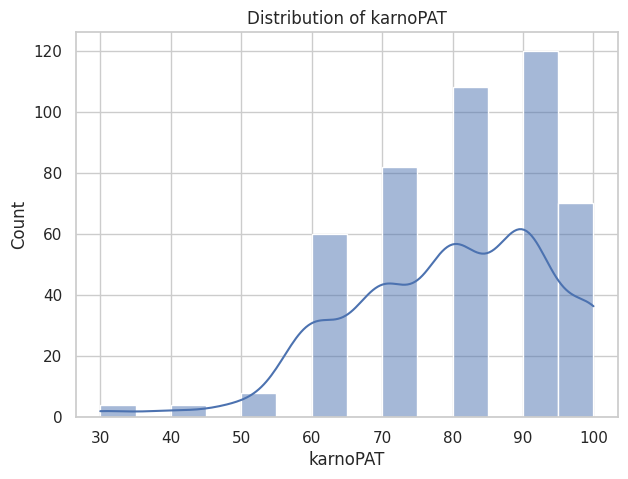

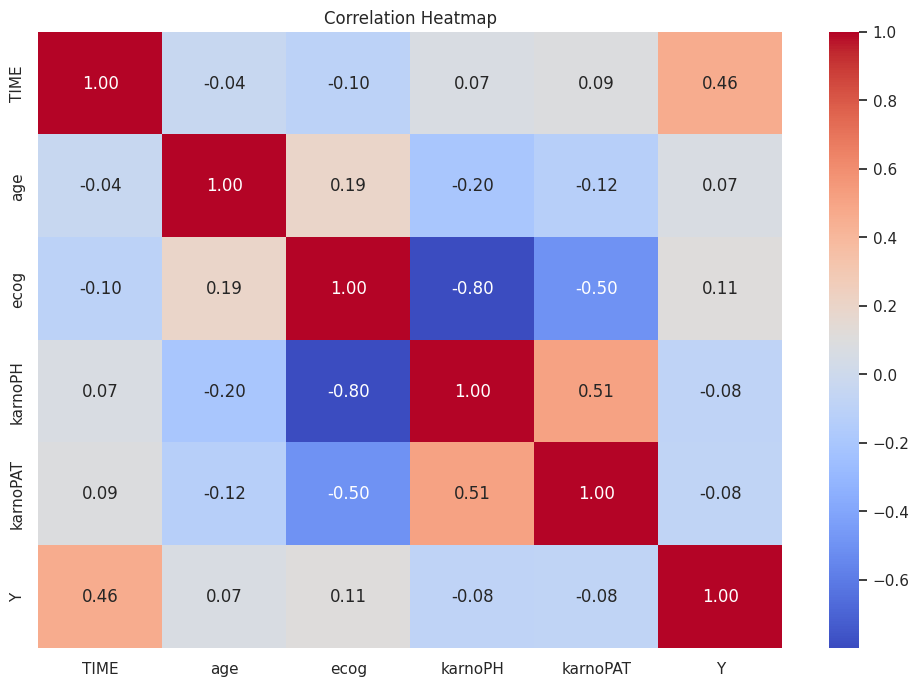


Logistic Regression
Confusion Matrix:
[[48 11]
 [10 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        59
           1       0.68      0.70      0.69        33

    accuracy                           0.77        92
   macro avg       0.75      0.76      0.75        92
weighted avg       0.77      0.77      0.77        92


Decision Tree
Confusion Matrix:
[[49 10]
 [ 8 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        59
           1       0.71      0.76      0.74        33

    accuracy                           0.80        92
   macro avg       0.79      0.79      0.79        92
weighted avg       0.81      0.80      0.81        92


Random Forest
Confusion Matrix:
[[46 13]
 [ 4 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84        59
   

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
2,Random Forest,0.815217,0.690476,0.878788,0.773333,0.940421
3,SVM (RBF),0.739130,0.621622,0.696970,0.657143,0.832563
0,Logistic Regression,0.771739,0.676471,0.696970,0.686567,0.800719
1,Decision Tree,0.804348,0.714286,0.757576,0.735294,0.794042


In [8]:
# =====================================================
# 0) Imports
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 5)

# =====================================================
# 1) Load Data
# =====================================================
df = pd.read_csv("lung_cancer.csv")

print("Dataset Shape:", df.shape)
display(df.head())

# =====================================================
# 2) Basic EDA
# =====================================================
print("\n--- Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Target Distribution ---")
print(df["Y"].value_counts())

# Target plot
sns.countplot(x="Y", data=df)
plt.title("Target Distribution (Lung Cancer)")
plt.show()

# Sex distribution
sns.countplot(x="sex", hue="Y", data=df)
plt.title("Sex vs Lung Cancer")
plt.show()

# Numeric feature distributions
num_cols = df.drop(columns=["ID", "sex", "Y"]).columns

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df[num_cols.tolist() + ["Y"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# =====================================================
# 3) Feature / Target Split
# =====================================================
X = df.drop(columns=["Y", "ID"])   # drop ID to avoid leakage
y = df["Y"]

cat_cols = ["sex"]
num_cols = [c for c in X.columns if c not in cat_cols]

# =====================================================
# 4) Train/Test Split
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =====================================================
# 5) Preprocessing
# =====================================================
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="if_binary"), cat_cols),
    ]
)

# =====================================================
# 6) Models
# =====================================================
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced_subsample"
    ),
    "SVM (RBF)": SVC(
        kernel="rbf",
        probability=True,
        class_weight="balanced",
        random_state=42
    )
}

# =====================================================
# 7) Train & Evaluate
# =====================================================
results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_prob = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = np.nan

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": auc
    })

    print("\n" + "="*60)
    print(name)
    print("="*60)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# =====================================================
# 8) Model Comparison
# =====================================================
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print("\n=== Model Comparison ===")
display(results_df)


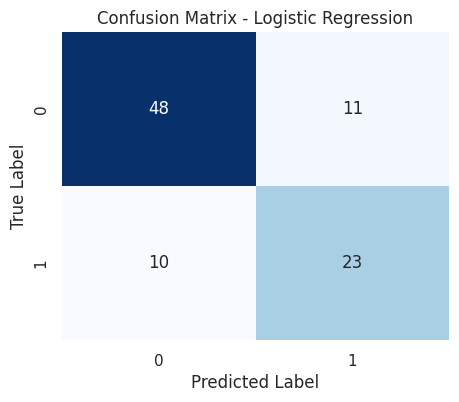

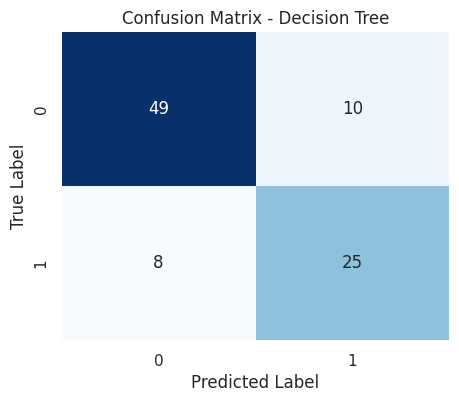

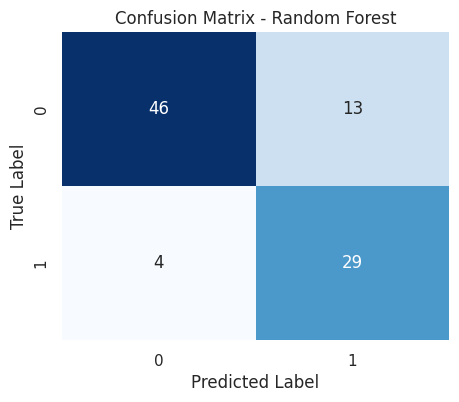

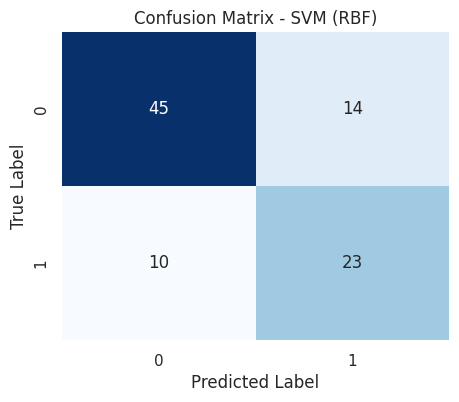

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False
    )
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


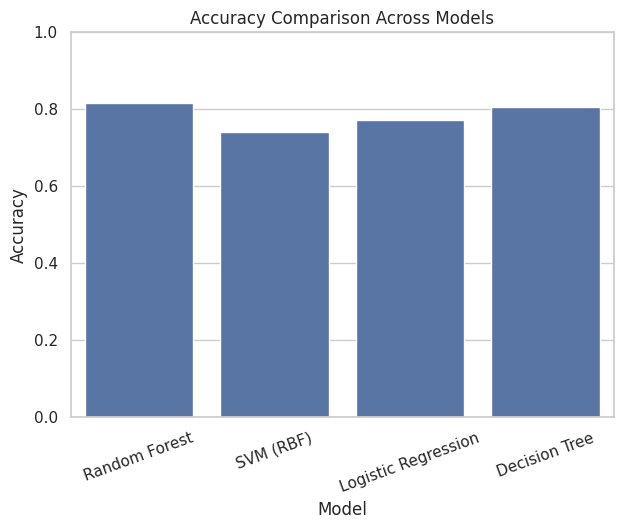

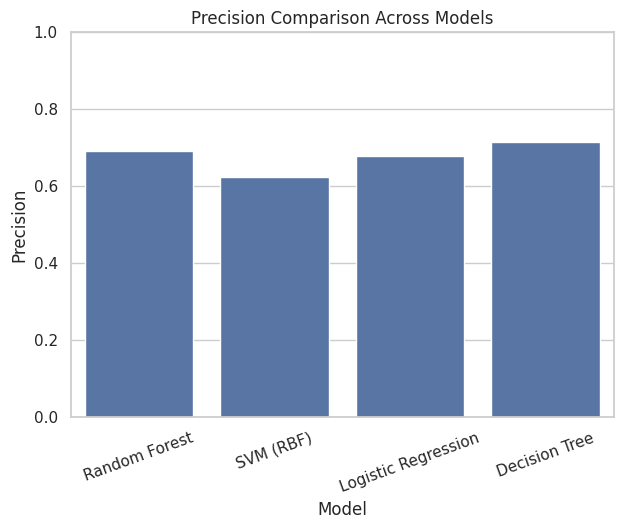

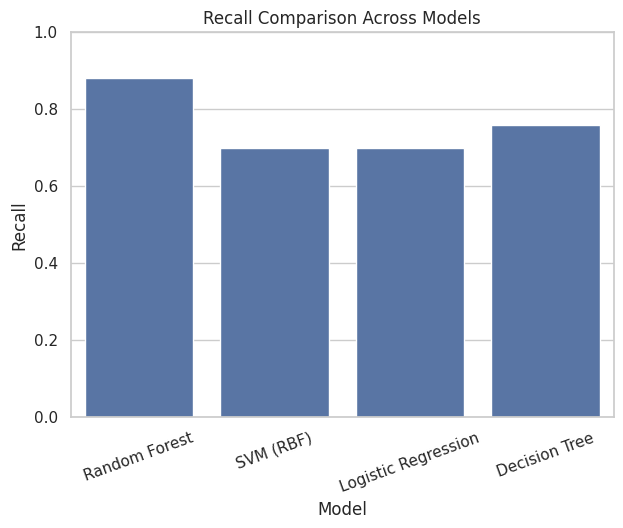

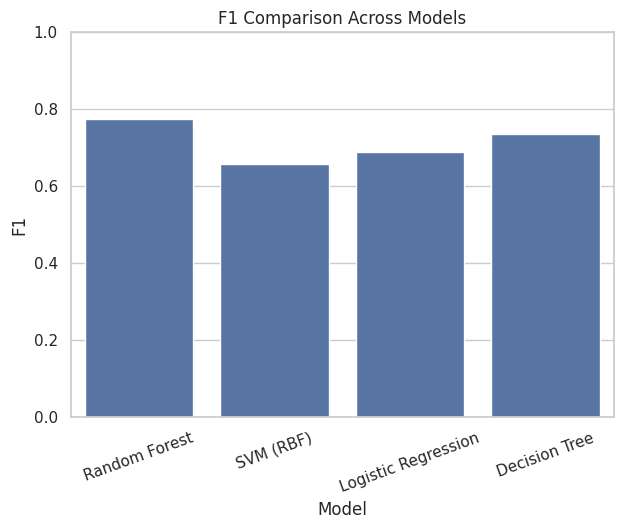

In [10]:
metrics = ["Accuracy", "Precision", "Recall", "F1"]

for metric in metrics:
    plt.figure(figsize=(7, 5))
    sns.barplot(
        x="Model",
        y=metric,
        data=results_df
    )
    plt.ylim(0, 1)
    plt.title(f"{metric} Comparison Across Models")
    plt.xticks(rotation=20)
    plt.show()
